<a href="https://colab.research.google.com/github/mulcahrj/DATA6545_Final/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = 'https://raw.githubusercontent.com/mulcahrj/DATA6545_Final/main/selected_features_train.csv'
features_train = pd.read_csv(path)

path = 'https://raw.githubusercontent.com/mulcahrj/DATA6545_Final/main/selected_features_test.csv'
features_test = pd.read_csv(path)

In [3]:
features_train.head()

,poutcome_success,emp.var.rate,euribor3m,cons.price.idx,cons.conf.idx,campaign,total_assets,rep_avg_rating,customer_length,qtr_bin_Q1,y
0,0,1.000000,0.967665,0.605052,0.408442,0.573524,0.553302,0.740661,0.787138,0,0
1,0,0.148320,0.061928,0.534818,0.235723,0.744386,0.817121,0.275429,0.357026,0,0
2,0,1.000000,0.968428,0.414483,0.692481,0.000000,0.191640,0.959432,0.966685,0,0
3,0,0.849418,0.929140,0.637496,0.680736,0.000000,0.399434,0.285757,0.369019,0,0
4,0,1.000000,0.967665,0.605052,0.408442,0.391017,0.291517,0.244337,0.325443,0,0


In [4]:
features_train.shape

(33980, 11)

In [5]:
features_test.head()

,poutcome_success,emp.var.rate,euribor3m,cons.price.idx,cons.conf.idx,campaign,total_assets,rep_avg_rating,customer_length,qtr_bin_Q1,y
0,0,1.000000,0.968772,0.426750,0.688095,0.000000,0.373313,0.492516,0.565686,0,0
1,1,0.149486,0.075470,0.289825,0.190106,0.396426,0.446175,0.881017,0.902103,0,1
2,0,1.000000,0.968772,0.616621,0.405799,0.000000,0.543997,0.702308,0.751870,0,0
3,0,0.420087,0.699399,0.335185,0.438079,0.000000,0.727375,0.153783,0.221523,0,0
4,0,1.000000,0.968394,0.616621,0.447200,0.580737,0.185583,0.028967,0.054738,0,0


In [6]:
features_test.shape

(11327, 11)

In [7]:
!pip install imblearn==0.0

In [8]:
# import required packages for splitting data
from sklearn import model_selection
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import 'random forest' model
from sklearn.ensemble import RandomForestClassifier

# balance the data
from imblearn.over_sampling import SMOTE

### Metrics and Scores

In [9]:
X_train = features_train.iloc[:,:-1].values
y_train = features_train.iloc[:,-1].values

X_test = features_test.iloc[:,:-1].values
y_test = features_test.iloc[:,-1].values

In [10]:
#Create a Gaussian Classifier
clf = RandomForestClassifier(criterion= 'entropy', max_depth= 8, max_features= 'auto', n_estimators= 200)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10020
           1       0.73      0.18      0.29      1307

    accuracy                           0.90     11327
   macro avg       0.82      0.59      0.62     11327
weighted avg       0.88      0.90      0.87     11327



In [12]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[9933,   87],
       [1072,  235]])

Text(0.5, 257.44, 'Predicted label')

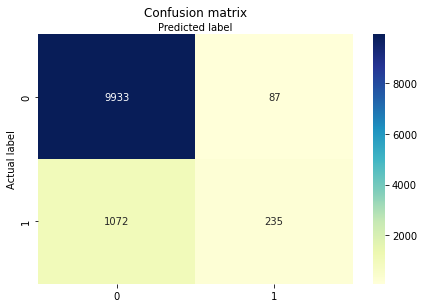

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8976781142403107
Precision: 0.7298136645962733
Recall: 0.17980107115531752


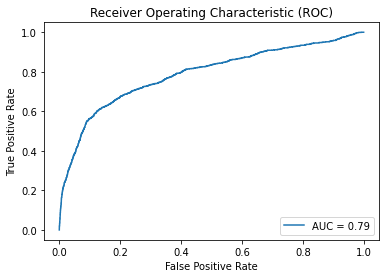

AUC Score: 0.7876697255832635


In [15]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label= 'AUC = %0.2f' % auc)
plt.legend(loc=4)
plt.title('Receiver Operating Characteristic (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC Score:', auc)

### Evaluation Function

In [16]:
clf = RandomForestClassifier(criterion= 'entropy', max_depth= 8, max_features= 'auto', n_estimators= 200)

In [17]:
#function inputs X:features.Y: Target, classifer: sklearn classifier, K:folds in cross validation, scoring: evaluation metric(f1)
def my_eval(X, y, classifer = clf, k=10, scoring = 'f1'):
    scores = []
    for i in range(5):
        #### generate random numbers to shuffle the data for training and test
        np.random.seed(2021)
        random_int = np.random.randint(0,3000)
        #### create cross validation folds
        kfold = model_selection.KFold(n_splits=k, random_state=random_int, shuffle=True)
        #### record the score 
        score = model_selection.cross_val_score(clf, X=X, y=y, cv=kfold, scoring=scoring)
        scores.append(score)
    scores = np.array(scores)
    #### we need to calculate the bias (average score) and viariance (std)
    bias, variance = round(scores.mean(),4), round(scores.std(),4)
    return(bias, variance)

###Smote

In [18]:
# Resampling and Balancing the data
sm = SMOTE(random_state = 2021) 
X_res, Y_res = sm.fit_resample(X_train, y_train) 

## Random Forest

In [19]:
#average f1_score from 10-fold CV 
clf = RandomForestClassifier(criterion= 'entropy', max_depth= 8, max_features= 'auto', n_estimators= 200)
my_eval(X_res, Y_res, clf, 10)

(0.7515, 0.0054)

In [20]:
#average ROC_AUC from 10-fold CV
my_eval(X_res, Y_res, clf, 10, 'roc_auc')

(0.878, 0.0056)